In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr',
                 thousands = ',', index_col='관서명')
df

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070
남대문서,1,0,6,4,65,46,1153,382,869,794
서대문서,2,2,5,4,154,124,1812,738,2056,1711
혜화서,3,2,5,4,96,63,1114,424,1015,861
용산서,5,5,14,14,194,173,1557,587,2050,1704
성북서,2,2,2,1,86,71,953,409,1194,1015
동대문서,5,5,13,13,173,146,1981,814,2548,2227
마포서,8,8,14,10,294,247,2555,813,2983,2519


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
영등포서,14,12,22,20,295,183,2964,978,3572,2961


In [8]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,50,70]}
dft = pd.DataFrame(data, index=['a','b','c','d'] )
dft

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,50
d,70,80,70


In [13]:
# dft.nlargest(3, 'math', keep='last')
dft.nlargest(3, 'math', keep='all') #nsmallest

,eng,kor,math
a,10,20,90
d,70,80,70
b,30,40,50
c,50,60,50


In [16]:
# 1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시요
df.nlargest(1, '살인 발생' ,keep='all')[['살인 발생','살인 검거']]

,살인 발생,살인 검거
관서명,,
영등포서,14,12


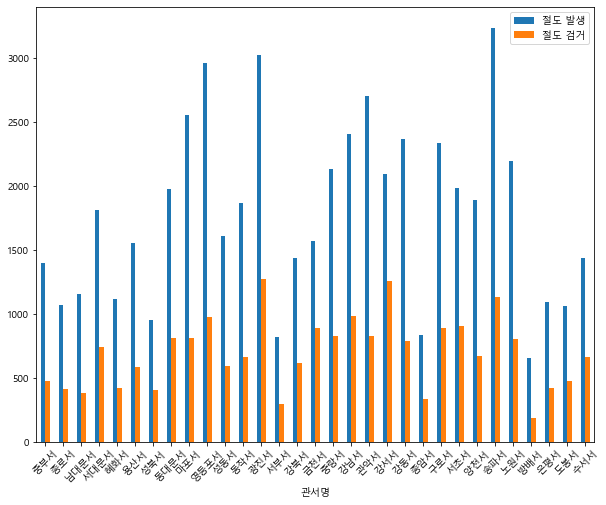

In [24]:
# 2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요
# df.plot( kind='bar',y=['절도 발생','절도 검거'], stacked=True)
df.plot( kind='bar',y=['절도 발생','절도 검거'], figsize=(10,8),rot=45)
plt.show()

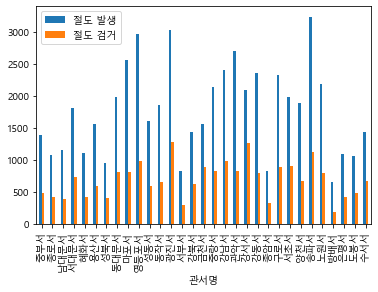

In [20]:
df[['절도 발생','절도 검거']].plot(kind='bar')
plt.show()

In [29]:
# 3. 절도검거율 컬럼을 추가 하시요
# df['절도검거율'] = df['절도 검거']/df['절도 발생']
df.insert( 7,'절도검거율1',df['절도 검거']/df['절도 발생'])

In [37]:
df.round(2)

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도검거율1,절도 검거,폭력 발생,폭력 검거,절도검거율
관서명,,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,0.34,477,1355,1170,0.34
종로서,3,3,6,5,115,98,1070,0.39,413,1278,1070,0.39
남대문서,1,0,6,4,65,46,1153,0.33,382,869,794,0.33
서대문서,2,2,5,4,154,124,1812,0.41,738,2056,1711,0.41
혜화서,3,2,5,4,96,63,1114,0.38,424,1015,861,0.38
용산서,5,5,14,14,194,173,1557,0.38,587,2050,1704,0.38
성북서,2,2,2,1,86,71,953,0.43,409,1194,1015,0.43
동대문서,5,5,13,13,173,146,1981,0.41,814,2548,2227,0.41
마포서,8,8,14,10,294,247,2555,0.32,813,2983,2519,0.32


In [ ]:
# 4. 폭력발생 top5를 구하시요( 관서명, 폭력발생, 폭력검거)

In [33]:
df.nlargest(5, '폭력 발생',keep='all')[['폭력 발생','폭력 검거']]

,폭력 발생,폭력 검거
관서명,,
영등포서,3572,2961
관악서,3298,2642
송파서,3295,2786
강서서,3207,2718
구로서,3007,2432


In [ ]:
# 5. 상관관계 heatmap을 그리시요

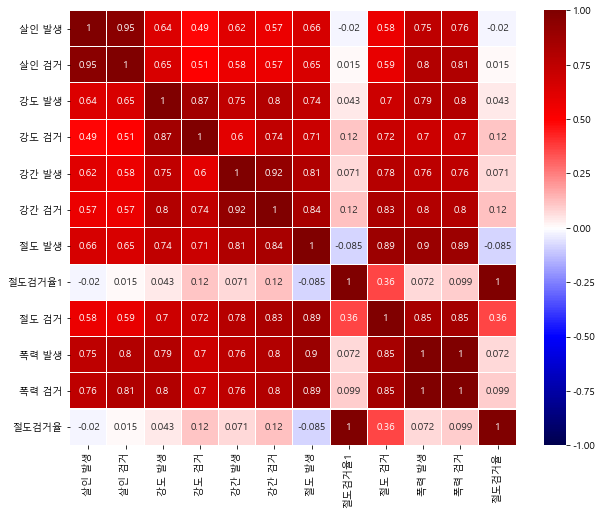

In [34]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), 
           vmin=-1, vmax=1, 
           annot=True, 
           linewidths=0.2,
           cmap='seismic') # 습관처럼 확인 *** 반드시 그리기
plt.show()

In [36]:
df[['살인 발생','폭력 발생']].corr()

,살인 발생,폭력 발생
살인 발생,1.000000,0.754575
폭력 발생,0.754575,1.000000
